In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-school-education-statistics/percentage-of-schools-with-water-facility-2013-2016.csv
/kaggle/input/indian-school-education-statistics/percentage-of-schools-with-comps-2013-2016.csv
/kaggle/input/indian-school-education-statistics/schools-with-girls-toilet-2013-2016.csv
/kaggle/input/indian-school-education-statistics/percentage-of-schools-with-electricity-2013-2016.csv
/kaggle/input/indian-school-education-statistics/gross-enrollment-ratio-2013-2016.csv
/kaggle/input/indian-school-education-statistics/dropout-ratio-2012-2015.csv
/kaggle/input/indian-school-education-statistics/schools-with-boys-toilet-2013-2016.csv


In [2]:
import matplotlib.pyplot as plt

df1 = pd.read_csv('/kaggle/input/indian-school-education-statistics/dropout-ratio-2012-2015.csv')
print(df1.head())

         State_UT     year Primary_Boys Primary_Girls Primary_Total  \
0   A & N Islands  2012-13         0.83          0.51          0.68   
1   A & N Islands  2013-14         1.35          1.06          1.21   
2   A & N Islands  2014-15         0.47          0.55          0.51   
3  Andhra Pradesh  2012-13          3.3          3.05          3.18   
4  Andhra Pradesh  2013-14         4.31          4.39          4.35   

  Upper Primary_Boys Upper Primary_Girls Upper Primary_Total Secondary _Boys  \
0     Uppe_r_Primary                1.09                1.23            5.57   
1                 NR                1.54                0.51            8.36   
2               1.44                1.95                1.69           11.47   
3               3.21                3.51                3.36           12.21   
4               3.46                4.12                3.78           11.95   

  Secondary _Girls Secondary _Total HrSecondary_Boys HrSecondary_Girls  \
0             5.55

# Analysis of Dropout for Schools in West Bengal

First we try to seperate the data

In [3]:
data_wb=df1[df1['State_UT']=='West Bengal']
print(data_wb.head())

        State_UT     year Primary_Boys Primary_Girls Primary_Total  \
104  West Bengal  2012-13         6.88          5.71           6.3   
105  West Bengal  2013-14         3.44          2.37          2.91   
106  West Bengal  2014-15         2.13          0.79          1.47   

    Upper Primary_Boys Upper Primary_Girls Upper Primary_Total  \
104               6.29                4.16                5.18   
105               5.63                 3.1                4.31   
106               5.84                2.88                 4.3   

    Secondary _Boys Secondary _Girls Secondary _Total HrSecondary_Boys  \
104           14.95            19.41             17.3             7.81   
105           16.73            19.77            18.34             8.03   
106           16.33            19.06             17.8             8.18   

    HrSecondary_Girls HrSecondary_Total  
104              8.49              8.13  
105              7.76               7.9  
106              8.04          

**Convert data into numeric (float data type)**

In [4]:
primary_boys=data_wb['Primary_Boys'].values.astype(np.float32);
primary_girls=data_wb['Primary_Girls'].values.astype(np.float32);

upper_primary_boys=data_wb['Upper Primary_Boys'].values.astype(np.float32);
upper_primary_girls=data_wb['Upper Primary_Girls'].values.astype(np.float32);

secondary_boys=data_wb['Secondary _Boys'].values.astype(np.float32);
secondary_girls=data_wb['Secondary _Girls'].values.astype(np.float32);

higher_secondary_boys=data_wb['HrSecondary_Boys'].values.astype(np.float32);
higher_secondary_girls=data_wb['HrSecondary_Girls'].values.astype(np.float32);

Retrieving the Years_Range mentioned in data

In [5]:
years=data_wb['year'].values;
print(years)

years_ind=[1,2,3]

['2012-13' '2013-14' '2014-15']


Plotting a Grouped Bar Graph for students for seperate categories grouped into the particular year

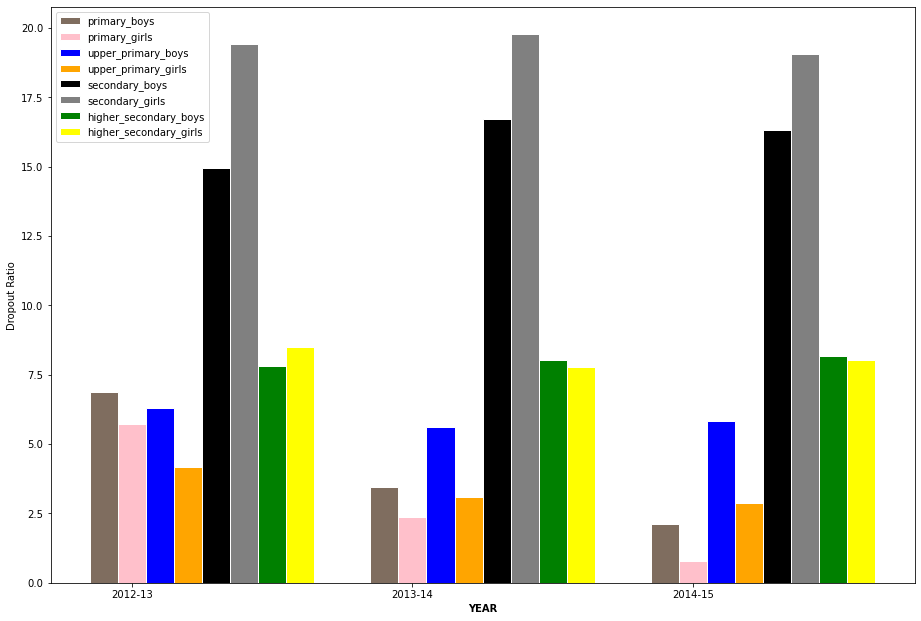

In [6]:
# set width of bar
barWidth = 0.10

#set figure
fig=plt.figure()
ax=fig.add_axes([5,5,2,2])

# set height of bar
bars1 = primary_boys
bars2 = primary_girls
bars3 = upper_primary_boys
bars4 = upper_primary_girls
bars5 = secondary_boys
bars6 = secondary_girls
bars7 = higher_secondary_boys
bars8 = higher_secondary_girls
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
 
# Make the plot
ax.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='primary_boys')
ax.bar(r2, bars2, color='pink', width=barWidth, edgecolor='white', label='primary_girls')
ax.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='upper_primary_boys')
ax.bar(r4, bars4, color='orange', width=barWidth, edgecolor='white', label='upper_primary_girls')
ax.bar(r5, bars5, color='black', width=barWidth, edgecolor='white', label='secondary_boys')
ax.bar(r6, bars6, color='grey', width=barWidth, edgecolor='white', label='secondary_girls')
ax.bar(r7, bars7, color='green', width=barWidth, edgecolor='white', label='higher_secondary_boys')
ax.bar(r8, bars8, color='yellow', width=barWidth, edgecolor='white', label='higher_secondary_girls')

# Add xticks on the middle of the group bars
plt.xlabel('YEAR', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], years)

plt.ylabel('Dropout Ratio')
 
# Create legend & Show graphic
plt.legend()
plt.show()


**It is quite clearly visible that, students in secondary category have dropped out the most as compared to others. This is possibly because many tend to change the study boards when they try to move from class X to class XI. They can move from WestBengal boards to ISC Board / CBSE Board schools which is the most common for West Bengal Students**

More analysis on other topics to follow soon.

# Gross Enrollment Stats

For this we need to import the gross-enrollment-ratio dataset

In [7]:
import matplotlib.pyplot as plt

df2 = pd.read_csv('/kaggle/input/indian-school-education-statistics/gross-enrollment-ratio-2013-2016.csv')
print(df2.head())

                    State_UT     Year  Primary_Boys  Primary_Girls  \
0  Andaman & Nicobar Islands  2013-14         95.88          91.97   
1             Andhra Pradesh  2013-14         96.62          96.87   
2          Arunachal Pradesh  2013-14        129.12         127.77   
3                      Assam  2013-14        111.77         115.16   
4                      Bihar  2013-14         95.03         101.15   

   Primary_Total  Upper_Primary_Boys  Upper_Primary_Girls  \
0          93.93               94.70                88.98   
1          96.74               82.81                84.38   
2         128.46              112.64               115.27   
3         113.43               87.85                98.69   
4          97.96               80.60                94.92   

   Upper_Primary_Total  Secondary_Boys  Secondary_Girls  Secondary_Total  \
0                91.83          102.89            97.36           100.16   
1                83.57           73.76            76.77     

In [8]:
data_wb=df2[df2['State_UT']=='West Bengal']
print(data_wb.head())

        State_UT     Year  Primary_Boys  Primary_Girls  Primary_Total  \
34   West Bengal  2013-14        103.16         104.88         104.00   
71   West Bengal  2015-16        103.13         104.26         103.68   
108  West Bengal  2014-15        101.78         102.91         102.33   

     Upper_Primary_Boys  Upper_Primary_Girls  Upper_Primary_Total  \
34                92.84               106.87                99.64   
71                97.90               112.64               105.00   
108               96.16               110.67               103.17   

     Secondary_Boys  Secondary_Girls  Secondary_Total Higher_Secondary_Boys  \
34            68.62            81.34            74.82                 47.38   
71            74.92            92.65            83.56                 48.98   
108           70.67            86.05            78.17                 48.27   

    Higher_Secondary_Girls Higher_Secondary_Total  
34                   48.96                  48.13  
71       

In [9]:
data_wb['Primary_Boys']=data_wb['Primary_Boys'].values.astype(np.float32);
data_wb['Primary_Girls']=data_wb['Primary_Girls'].values.astype(np.float32);

data_wb['Upper_Primary_Boys']=data_wb['Upper_Primary_Boys'].values.astype(np.float32);
data_wb['Upper_Primary_Girls']=data_wb['Upper_Primary_Girls'].values.astype(np.float32);

data_wb['Secondary_Boys']=data_wb['Secondary_Boys'].values.astype(np.float32);
data_wb['Secondary_Girls']=data_wb['Secondary_Girls'].values.astype(np.float32);

data_wb['Higher_Secondary_Boys']=data_wb['Higher_Secondary_Boys'].values.astype(np.float32);
data_wb['Higher_Secondary_Girls']=data_wb['Higher_Secondary_Girls'].values.astype(np.float32);

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [10]:
import plotly.express as px
fig = px.bar(data_wb, x="Year", y=["Primary_Boys","Primary_Girls", "Upper_Primary_Boys","Upper_Primary_Girls" ,"Secondary_Boys","Secondary_Girls", "Higher_Secondary_Boys","Higher_Secondary_Girls"], title="Gross Enrollment Year-Wise for all ")
fig.show()

**From this chart, we can confirm that Upper_Primary_Girls enrollment has been maximum in West Bengal schools over the years. Another observation is that in the Higher Secondary category, the gross enrollment is the lowest, possibly because many students are transferred to better schools in other states or get transferred to join different coaching instituations.** 

# Analysis on Percentage Change

## On basis of above results, now we will analyse the percentage change in gross enrollment for all the states in a specific year

Percentage change is being calculated by taking values from Upper_Primary_Total column and Higher_Secondary_Total column
It will be negative for most cases as the gross enrollment has decreased in most of the states.

Calculating percentage change of secondary to higher secondary

In [11]:
import numpy as np
df4=df2[df2.columns[[0,1,10,13]]]

print(df4.head())
df4=df4.replace('NR',0)
df4=df4.replace('@',0)


df4['Secondary_Total']=df4['Secondary_Total'].values.astype(np.float32);
df4['Higher_Secondary_Total']=df4['Higher_Secondary_Total'].values.astype(np.float32);


sec_total=df4["Secondary_Total"].values
high_sec_total=df4["Higher_Secondary_Total"].values

per_change=np.divide((high_sec_total-sec_total),sec_total)

print(per_change)
print(len(per_change))
print(len(df4))

df4['percentage_change']=per_change

print(df4.head())

                    State_UT     Year  Secondary_Total Higher_Secondary_Total
0  Andaman & Nicobar Islands  2013-14           100.16                 101.28
1             Andhra Pradesh  2013-14            75.20                   60.3
2          Arunachal Pradesh  2013-14            86.65                  65.27
3                      Assam  2013-14            71.21                  32.94
4                      Bihar  2013-14            60.08                   23.7
[ 0.01118206 -0.19813828 -0.2467398  -0.5374245  -0.605526   -0.00673111
 -0.41596082 -0.5261774  -0.39956683 -0.01933597 -0.3414589  -0.34885907
 -0.193249   -0.20098081 -0.22191904 -0.3732535  -0.76267904 -0.14564432
 -0.25820857 -0.46298742 -0.31327415 -0.26239622 -0.6848901  -0.4383793
 -0.51670575 -1.         -0.2723493  -0.16900103 -0.3260041  -0.36342382
 -0.17978376 -0.64968807 -0.07419159 -0.13461106 -0.35672277 -0.31876305
 -0.13923174 -0.20328435 -0.3103871  -0.49980664 -0.5454894  -0.04484463
 -0.41259655 -0.452523

Percentage change Visualization for the year 2013-14 for all states

In [12]:
import plotly.express as px
df4_1=df4[df4["Year"]=='2013-14']
fig = px.bar(df4_1, x='State_UT', y='percentage_change')
fig.show()

Percentage change Visualization for the year 2014-15 for all states

In [13]:
import plotly.express as px
df4_2=df4[df4["Year"]=='2014-15']
fig = px.bar(df4_2, x='State_UT', y='percentage_change')
fig.show()

Percentage change Visualization for the year 2015-16 for all states

In [14]:
import plotly.express as px
df4_3=df4[df4["Year"]=='2015-16']
fig = px.bar(df4_3, x='State_UT', y='percentage_change')
fig.show()

## Observations:

* Values for Odisha are not correct so for 2013-14 and 2014-15 it is giving abnormal values
* Over the years, Tripura's trend of decrease in gross enrollment has not changed.